In [2]:
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [3]:
#Importing tag pileup option
#/home/ubuntu/honors_research/PlusOneDyad_SORT-Expression_250bp_BNase-seq_50U-30min_tagpileup
tagpileup_output = pd.read_csv('/home/ubuntu/honors_research/PlusOneDyad_SORT-Expression_250bp_BNase-seq_50U-30min_tagpileup_sense.cdt', sep='\t')

#Getting rid of YORF column
tagpileup_output = tagpileup_output.drop(columns=['YORF'])
display(tagpileup_output)

nucleosome = pd.read_csv('/home/ubuntu/honors_research/RefPT-Krebs/PlusOneDyad_SORT-Expression_250bp.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'name', 'score', 'strand'])
display(nucleosome.head())

,NAME,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,Nuc-4276135-chr6_27892956_27893120_stddev=10.7...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Nuc-4610123-chr7_26200535_26200699_stddev=17.9...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Nuc-4273239-chr6_27147175_27147339_stddev=17.3...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nuc-5468320-chrM_2934_3098_stddev=21.351939617...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Nuc-4273238-chr6_27146674_27146838_stddev=18.0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14505,Nuc-364916-chr1_151156639_151156803_stddev=19....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14506,Nuc-355712-chr1_148679344_148679508_stddev=23....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14507,Nuc-347296-chr1_145885685_145885849_stddev=12....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14508,Nuc-316196-chr1_117001685_117001849_stddev=24....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,chrom,start,end,name,score,strand
0,chr6,27892913,27893163,Nuc-4276135-chr6_27892956_27893120_stddev=10.7...,1,-
1,chr7,26200492,26200742,Nuc-4610123-chr7_26200535_26200699_stddev=17.9...,2,-
2,chr6,27147132,27147382,Nuc-4273239-chr6_27147175_27147339_stddev=17.3...,3,+
3,chrM,2891,3141,Nuc-5468320-chrM_2934_3098_stddev=21.351939617...,4,+
4,chr6,27146631,27146881,Nuc-4273238-chr6_27146674_27146838_stddev=18.0...,5,-


In [4]:
# Getting rid of NAME column in tagpileup
tagpileup_count = tagpileup_output.drop(columns=['NAME'])

# Accessing the column "0" in tagpileup_output
column_0 = tagpileup_output["0"]
column_0

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14505    0.0
14506    0.0
14507    0.0
14508    0.0
14509    0.0
Name: 0, Length: 14510, dtype: float64

In [5]:
# Get bins
# Add up mutatinos at first bp position of the bin (e.g. bp 0 for 0-9 bin)-> first phase
# Add mutatinos at second position of bin -> second phase



# Define the total number of phases (e.g., 10 bins for 0-9, 10-19, ..., 240-249)
num_phases = 10

# Initialize a list to store the phase counts for each nucleosome
nucleosome_phase_counts = []

# Iterate through each nucleosome (row) in tagpileup_count
for _, row in tagpileup_output.iterrows():
    # Initialize a dictionary to store phase counts for the current nucleosome
    phase_counts = {}
    
    # Loop through each phase
    for phase in range(num_phases):
        # Get the column indices for the current phase (e.g., 0, 10, 20, ..., for phase 0)
        bin_columns = [str(i) for i in range(phase, 250, 10) if str(i) in tagpileup_count]  # Convert indices to strings to match column names
        
        # Sum the mutation counts for the selected columns for the current nucleosome
        mutation_count = row[bin_columns].sum()
        
        # Store the mutation count for the current phase
        phase_counts[f'phase_{phase + 1}'] = mutation_count  # Phase numbers start from 1
    
    # Add the nucleosome name and phase counts to the list
    nucleosome_phase_counts.append({
        'NAME': row['NAME'],  # Assuming 'NAME' column identifies the nucleosome
        **phase_counts
    })

# Convert the results into a DataFrame
nucleosome_phase_counts_df = pd.DataFrame(nucleosome_phase_counts)
nucleosome_phase_counts_df

#clustering (sklearn hierarchial clustering)



,NAME,phase_1,phase_2,phase_3,phase_4,phase_5,phase_6,phase_7,phase_8,phase_9,phase_10
0,Nuc-4276135-chr6_27892956_27893120_stddev=10.7...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Nuc-4610123-chr7_26200535_26200699_stddev=17.9...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Nuc-4273239-chr6_27147175_27147339_stddev=17.3...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nuc-5468320-chrM_2934_3098_stddev=21.351939617...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Nuc-4273238-chr6_27146674_27146838_stddev=18.0...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14505,Nuc-364916-chr1_151156639_151156803_stddev=19....,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14506,Nuc-355712-chr1_148679344_148679508_stddev=23....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14507,Nuc-347296-chr1_145885685_145885849_stddev=12....,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14508,Nuc-316196-chr1_117001685_117001849_stddev=24....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:

nucleosome_phase_counts_df = nucleosome_phase_counts_df.set_index('NAME')

In [7]:
#do hierarchial clustering for nucleosome_phase_counts_df
nucleosome_phase_counts_df.index.name = ''
nucleosome_phase_counts_df.columns.name = ''

nucleosome_phase_counts_df

,phase_1,phase_2,phase_3,phase_4,phase_5,phase_6,phase_7,phase_8,phase_9,phase_10
,,,,,,,,,,
Nuc-4276135-chr6_27892956_27893120_stddev=10.77548658349641,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Nuc-4610123-chr7_26200535_26200699_stddev=17.997985998438825,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Nuc-4273239-chr6_27147175_27147339_stddev=17.353353822500388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nuc-5468320-chrM_2934_3098_stddev=21.351939617837697,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nuc-4273238-chr6_27146674_27146838_stddev=18.05394426659358,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
Nuc-364916-chr1_151156639_151156803_stddev=19.190271726205957,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Nuc-355712-chr1_148679344_148679508_stddev=23.228933107943924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nuc-347296-chr1_145885685_145885849_stddev=12.781755117701517,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Conducting PCA Analysis

In [ ]:

# numeric_data = nucleosome_phase_counts_df.values  # Extract numeric data as a NumPy array

# # Standardize the data (optional but recommended for clustering)
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(numeric_data)

# # Perform hierarchical clustering
# # You can adjust the number of clusters (n_clusters) as needed
# clustering = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
# labels = clustering.fit_predict(scaled_data)

# # Add the cluster labels back to the DataFrame
# nucleosome_phase_counts_df['Cluster'] = labels

# # Plot the dendrogram for visualization
# # Use a subset of the data to avoid recursion issues
# subset_size = 1000  # Adjust the size of the subset as needed
# subset_data = scaled_data[:subset_size]  # Take the first `subset_size` rows

# plt.figure(figsize=(10, 7))
# dendrogram = sch.dendrogram(
# 	sch.linkage(subset_data, method='ward'),
# 	no_labels=True  # Suppress labels to avoid recursion issues
# )
# plt.title('Hierarchical Clustering Dendrogram (Subset)')
# plt.xlabel('Nucleosomes (Subset)')
# plt.ylabel('Euclidean Distance')
# plt.show()

# # Display the DataFrame with cluster labels
# print(nucleosome_phase_counts_df)

KeyboardInterrupt: 

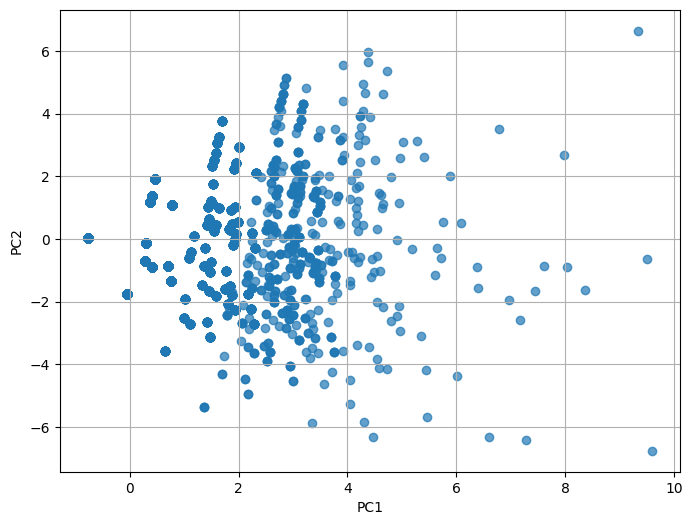

Explained Variance Ratio: [0.11490149 0.10545062 0.1023084 ]


In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming nucleosome_phase_counts_df is already loaded as a DataFrame
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nucleosome_phase_counts_df)

# Step 2: Perform PCA
pca = PCA(n_components=3)  # Adjust n_components as needed
principal_components = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame for PCA results
# Adjust column names to match the number of components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Step 4: Visualize the PCA results (optional)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# Step 5: Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)



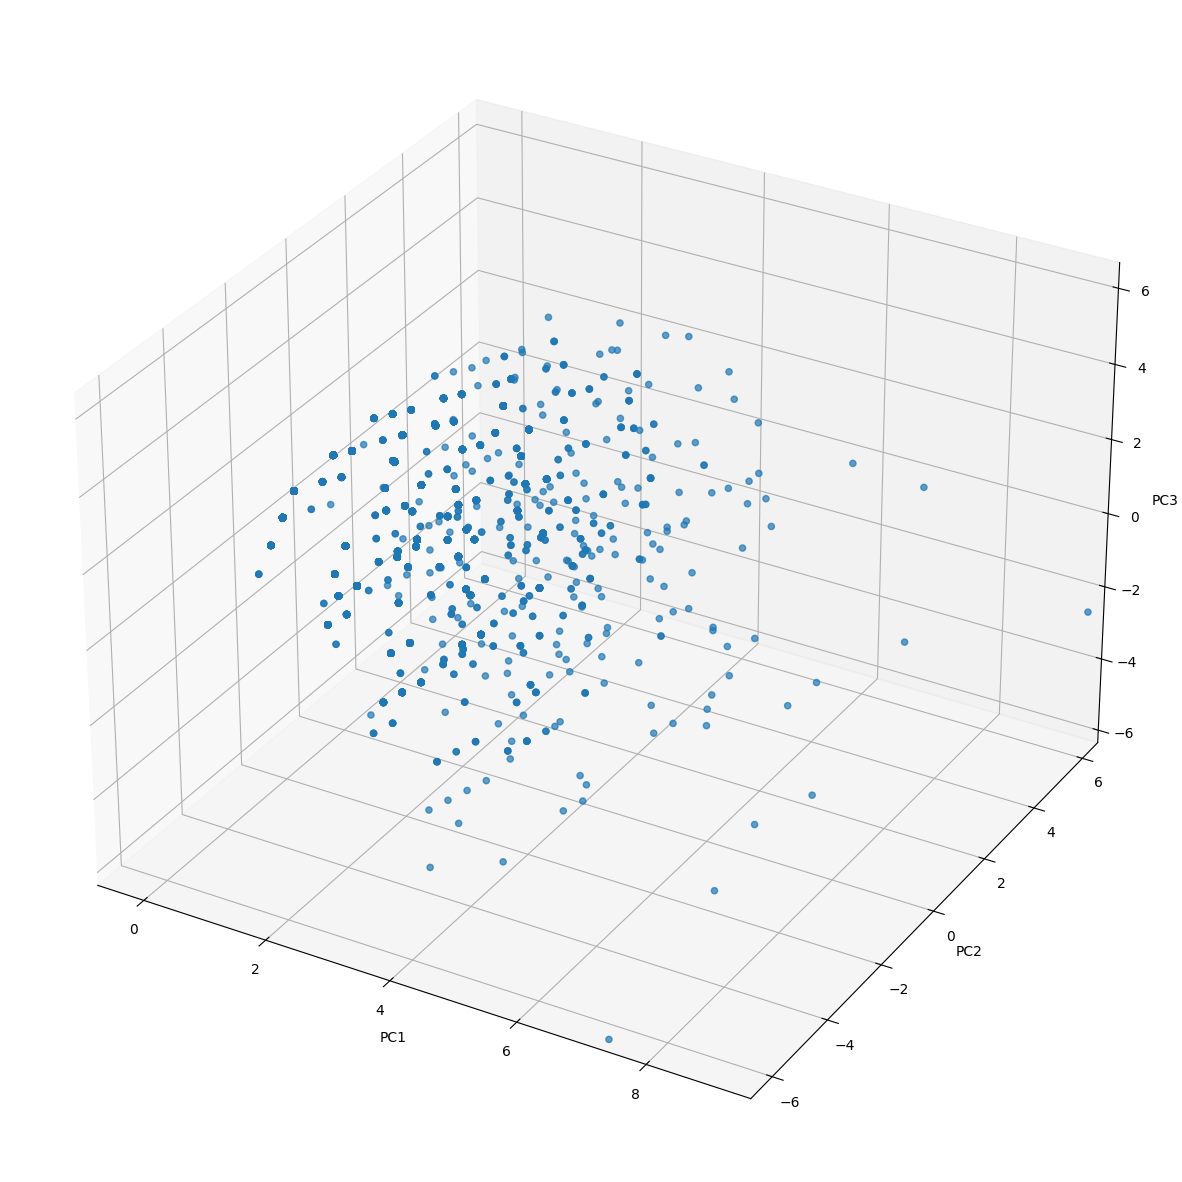

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Step 3: Create a 3D scatter plot
fig = plt.figure(figsize=(15, 18))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.7)

# Add labels
ax.set_xlabel('PC1')  # Add padding to the label
ax.set_ylabel('PC2')  # Add padding to the label
ax.set_zlabel('PC3')   # Add padding to the label

ax.set_xlim(pca_df['PC1'].min(), pca_df['PC1'].max())
ax.set_ylim(pca_df['PC2'].min(), pca_df['PC2'].max())
ax.set_zlim(pca_df['PC3'].min(), pca_df['PC3'].max())

plt.show()

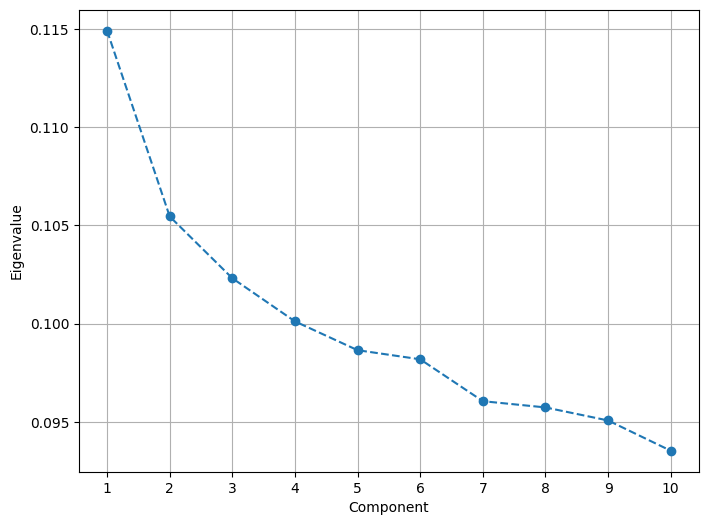

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming nucleosome_phase_counts_df is already loaded as a DataFrame
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nucleosome_phase_counts_df)

# Step 2: Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Step 3: Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Create Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()